# House Price prediction

## Building the model

### Import Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Read the data
df = pd.read_csv('train.csv')

# Remove rows with missing target, separate target from predictors
df.dropna(axis=0, subset=['SalePrice'], inplace=True)

X_full =df.copy()
y = X_full.pop('SalePrice')

### Explore data

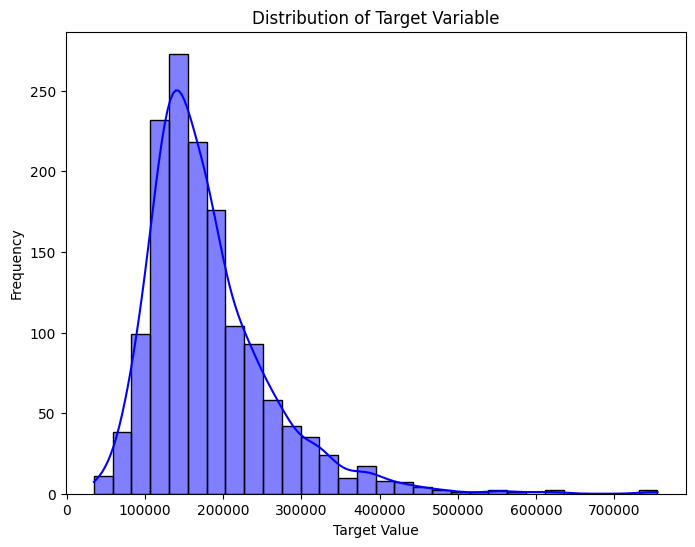

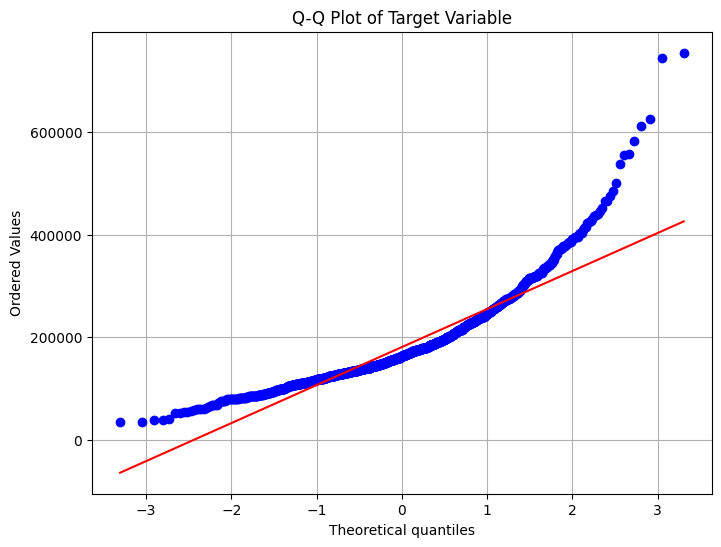

In [49]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True, color='blue')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()


def qqPlot(y):
    plt.figure(figsize=(8, 6))
    stats.probplot(y, dist="norm", plot=plt)

    plt.title('Q-Q Plot of Target Variable')
    plt.grid(True)
    plt.show()

qqPlot(y)


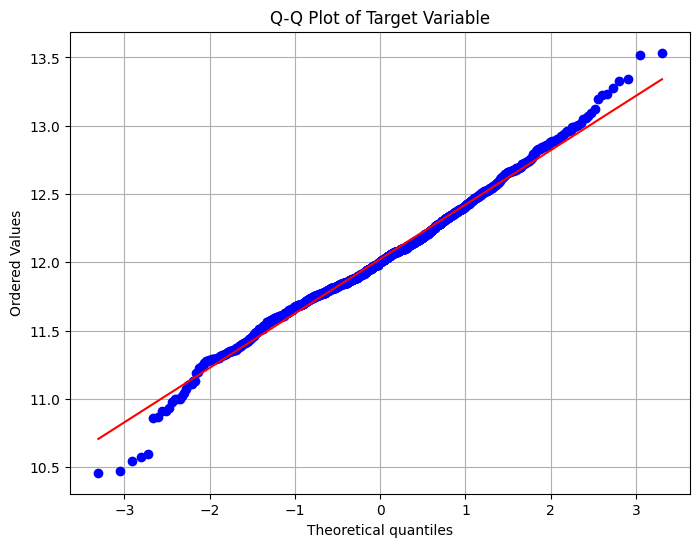

In [50]:
y_log = np.log(y)
qqPlot(y_log)

### Data preprocessing

In [4]:
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

def clean_data(df):

    print("Columns before cleaning:", df.columns.tolist())

    # Replace missing values with "Nan" in columns: 'PoolQC', 'FireplaceQu'
    df = df.fillna({'PoolQC': "Nan", 'FireplaceQu': "Nan", 'GarageQual': "Nan", 'GarageCond': "Nan", 'BsmtQual': "Nan", 'BsmtCond': "Nan",'BsmtExposure': "Nan", 'GarageFinish': 'Nan'})
    # Drop unnecesary columns
    columns_to_drop = ['MiscVal', 'MiscFeature', 'Alley', 'Fence', 'Id', 'Condition1', 'Condition2','RoofMatl','CentralAir','LowQualFinSF', 'MoSold', 'SaleType','SaleCondition','Street']
    df = df.drop(columns=columns_to_drop, errors='ignore')

    df['HasPool'] = (df['PoolArea'] > 0).astype(int)
    
    condition_map={
        'Nan': 0,
        'Po': 1,
        'Fa': 2,
        'TA': 3,
        'Gd': 4,
        'Ex': 5
    }
    df['ExterQual'] = df['ExterQual'].map(condition_map)
    df['ExterCond'] = df['ExterCond'].map(condition_map)
    df['KitchenQual'] = df['KitchenQual'].map(condition_map)
    df['FireplaceQu'] = df['FireplaceQu'].map(condition_map)
    df['GarageQual'] = df['GarageQual'].map(condition_map)
    df['GarageCond'] = df['GarageCond'].map(condition_map)
    df['PoolQC'] = df['PoolQC'].map(condition_map)
    df['BsmtQual'] = df['BsmtQual'].map(condition_map)
    df['BsmtCond'] = df['BsmtCond'].map(condition_map)
    df['HeatingQC'] = df['HeatingQC'].map(condition_map)
    df['BsmtExposure'] = df['BsmtExposure'].map({
        'Nan': 0,
        'No': 1,
        'Mn': 2,
        'Av': 3,
        'Gd':4
    })
    ratings = {
        'GLQ': 6,
        'ALQ': 5,
        'BLQ': 4,
        'Rec': 3,
        'LwQ': 2,
        'Unf': 1,
        'NA': 0
    }
    df['BsmtFinType1'] = df['BsmtFinType1'].map(ratings)
    df['BsmtFinType2'] = df['BsmtFinType2'].map(ratings)
    df['TotalSF'] = df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']+df['WoodDeckSF']+df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']+df['MasVnrArea']
    df['TotalBaths'] = df['BsmtHalfBath']+df['HalfBath']+df['BsmtFullBath']+df['FullBath']
    df['Functional'] = df['Functional'].map({
        'Sal': 0,
        'Sev': 1,
        'Maj2': 2,
        'Maj1': 3,
        'Mod': 4,
        'Min2': 5,
        'Min1': 6,
        'Typ':7
    })
    df['GarageFinish'] = df['GarageFinish'].map({
        'Nan': 0,
        'Unf': 1,
        'RFn': 2,
        'Fin': 3,
    })
    df['PavedDrive'] = df['PavedDrive'].map({
        'N': 0,
        'P': 1,
        'Y': 2,
    })

    print("Columns after cleaning:", df.columns.tolist())

    return df
DataCleaner = FunctionTransformer(clean_data, validate=False)

X = clean_data(X_full.copy())
X.head()

Columns before cleaning: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPor

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,YrSold,HasPool,TotalSF,TotalBaths
0,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2008,0,2823.0,4
1,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,2007,0,2822.0,3
2,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,2008,0,2910.0,4
3,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2006,0,2780.0,2
4,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,2008,0,3969.0,4


In [ ]:
# Cluster Neigborhood?

### Define Pipelines

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Base Model
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(
    n_estimators=100,
    random_state=1
    )


mi_selector = SelectKBest(score_func=mutual_info_regression, k=300)

# Transformers

num_cols = X.select_dtypes(exclude='object').columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

numerical_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', MinMaxScaler())
    ])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Nan')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

column_transformer = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols),
    ],sparse_threshold=0, remainder='passthrough')


#Preprosessor
Preprosessor = Pipeline(steps=[
    ('Data_clean', DataCleaner),
    ('transform', column_transformer,)
])

#pipeline
ModelPipeline = Pipeline(steps=[
    ('Preprosessor', Preprosessor),
    ('FeateSelection', mi_selector),
    ('model', model1)
])


In [55]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y_log,test_size=0.2, random_state=1)

X_train_preprocessed = Preprosessor.fit_transform(X_train)
X_valid_preprocessed = Preprosessor.transform(X_valid)
pd.DataFrame(X_train_preprocessed).head()

Columns before cleaning: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'YrSold', 'HasPool', 'TotalSF', 'TotalBaths']
Columns after cleaning

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.411765,0.214058,0.034948,0.444444,0.714286,0.202899,0.883333,0.0000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.191693,0.044404,0.333333,0.714286,0.202899,0.833333,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.207668,0.034901,0.666667,0.428571,0.963768,0.916667,0.0000,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.235294,0.261981,0.046680,0.666667,0.571429,0.847826,0.650000,0.2125,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.198083,0.028582,0.555556,0.428571,0.956522,0.900000,0.0000,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Train model

In [64]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error, mean_squared_error
from sklearn.model_selection import cross_val_score

ModelPipeline.fit(X_train,y_train)
preds = ModelPipeline.predict(X_valid)
mae = mean_absolute_error(preds, y_valid)
r2 = r2_score(preds, y_valid)
rmse = root_mean_squared_error(preds, y_valid)

print(f'mae: {mae}')
print(f'rmse: {rmse}')
print(f'r2: {r2}')

Columns before cleaning: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'YrSold', 'HasPool', 'TotalSF', 'TotalBaths']
Columns after cleaning

C:\Users\lassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=300 is greater than n_features=178. All the features will be returned.
  warnings.warn(


Columns before cleaning: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'YrSold', 'HasPool', 'TotalSF', 'TotalBaths']
Columns after cleaning

## Tune the model

### Finding optimal parameters

In [13]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [20, 50, 100],        # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required in a leaf node
    'bootstrap': [True, False]            # Whether bootstrap samples are used
}

grid_search = GridSearchCV(estimator=model1, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_preprocessed,y_train)

print(grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid_preprocessed)

accuracy = mean_absolute_error(y_valid, y_pred)
print(f'mae: {accuracy}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
mae: 16530.795139554488


### Test differend models

In [14]:
X_train_xgb = pd.DataFrame(X_train_preprocessed)
X_valid_xgb = pd.DataFrame(X_valid_preprocessed)
X_train_xgb

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.411765,0.214058,0.034948,0.444444,0.714286,0.202899,0.883333,0.00000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.191693,0.044404,0.333333,0.714286,0.202899,0.833333,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.207668,0.034901,0.666667,0.428571,0.963768,0.916667,0.00000,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.235294,0.261981,0.046680,0.666667,0.571429,0.847826,0.650000,0.21250,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.198083,0.028582,0.555556,0.428571,0.956522,0.900000,0.00000,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.000000,0.249201,0.041319,0.555556,0.428571,0.739130,0.400000,0.10875,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1164,0.000000,0.255591,0.040291,0.444444,0.428571,0.594203,0.066667,0.06875,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1165,0.294118,0.191693,0.026091,0.555556,0.714286,0.304348,0.933333,0.00000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1166,0.823529,0.067093,0.001776,0.555556,0.142857,0.717391,0.350000,0.37750,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
from xgboost import XGBRegressor

model2 = XGBRegressor(n_estimators=1000,
                      learning_rate=0.01,
                      early_stopping_rounds=20,
                      enable_categorical=True,
                      random_state=1)



# Fit the model
model2.fit(X_train_xgb, y_train, eval_set=[(X_valid_xgb, y_valid)], verbose=True)

[0]	validation_0-rmse:0.41635
[1]	validation_0-rmse:0.41334
[2]	validation_0-rmse:0.41019
[3]	validation_0-rmse:0.40729
[4]	validation_0-rmse:0.40423
[5]	validation_0-rmse:0.40127
[6]	validation_0-rmse:0.39827
[7]	validation_0-rmse:0.39542
[8]	validation_0-rmse:0.39257
[9]	validation_0-rmse:0.38979
[10]	validation_0-rmse:0.38692
[11]	validation_0-rmse:0.38416
[12]	validation_0-rmse:0.38149
[13]	validation_0-rmse:0.37880
[14]	validation_0-rmse:0.37618
[15]	validation_0-rmse:0.37358
[16]	validation_0-rmse:0.37094
[17]	validation_0-rmse:0.36837
[18]	validation_0-rmse:0.36586
[19]	validation_0-rmse:0.36344
[20]	validation_0-rmse:0.36101
[21]	validation_0-rmse:0.35855
[22]	validation_0-rmse:0.35614
[23]	validation_0-rmse:0.35372
[24]	validation_0-rmse:0.35139
[25]	validation_0-rmse:0.34914
[26]	validation_0-rmse:0.34688
[27]	validation_0-rmse:0.34463
[28]	validation_0-rmse:0.34241
[29]	validation_0-rmse:0.34022
[30]	validation_0-rmse:0.33801
[31]	validation_0-rmse:0.33591
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=20,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [58]:
y_train_np = np.array(y_train)
y_valid_np = np.array(y_valid)
y_train_np

array([11.89067673, 11.57355009, 12.01364014, ..., 11.75194237,
       11.4019939 , 11.30220443])

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim

X_train_t = torch.tensor(X_train_preprocessed, dtype=torch.float32)
x_valid_t = torch.tensor(X_valid_preprocessed, dtype=torch.float32)
y_train_t = torch.tensor(y_train_np, dtype=torch.float32)
y_valid_t = torch.tensor(y_valid_np, dtype=torch.float32)

class Model_nn(nn.Module):
    def __init__(self):
        super(Model_nn, self).__init__()
        self.fc1 = nn.Linear(X_train_t.shape[1], 500)  # Input layer
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 100)
        self.fc4 = nn.Linear(100, 1)
        self.dropout = nn.Dropout(0.3)
        self.bn1 = nn.BatchNorm1d(500)
    
    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  # No activation for output
        return x

model_nn = Model_nn()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_nn.parameters(), lr=0.001)



In [60]:
epochs = 1000
train_losses = []
valid_losses = []
for epoch in range(epochs):
    model_nn.train()
    
    # Forward pass
    predictions = model_nn(X_train_t)
    train_loss = criterion(predictions, y_train_t.view(-1, 1))
    train_losses.append(train_loss.item())
    
    # Backward pass
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {train_loss.item()}')


# Evaluation
model_nn.eval()
with torch.no_grad():
    test_predictions = model_nn(x_valid_t)
    test_loss = criterion(test_predictions, y_valid_t.view(-1, 1))
    valid_losses.append(test_loss.item())
    print(f'Test Loss: {test_loss.item()}')


Epoch 100/1000, Loss: 0.9136607646942139
Epoch 200/1000, Loss: 0.8392540216445923
Epoch 300/1000, Loss: 0.8137506246566772
Epoch 400/1000, Loss: 0.7905135750770569
Epoch 500/1000, Loss: 0.740605890750885
Epoch 600/1000, Loss: 0.7253277897834778
Epoch 700/1000, Loss: 0.6922816038131714
Epoch 800/1000, Loss: 0.7323551177978516
Epoch 900/1000, Loss: 0.6649640202522278
Epoch 1000/1000, Loss: 0.6287318468093872
Test Loss: 0.2909034490585327
